In [3]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Store data locally for confidentiality reasons!
data_path = "/Users/victor/Documents/Confidential Dataset/ML_NOAC_NOVA_Extraction.csv"

# Read data
df2 = pd.read_csv(data_path)

In [16]:
df = df2.copy()

In [29]:
# Drop columns with no email content
df = df.dropna(subset=['LastIncomingEmail__c'])

# Drop this column as it contains always the same string "Case" or "Contact"
df = df.drop(['attributes.type', 'Contact.attributes.type'], axis=1)

# drop the columns with only null values
df = df.drop(['Contact'], axis=1)

In [30]:
#create a new column for the email content initalized to empty string
df['LastIncomingEmailContent'] = ''

In [31]:
# convert to TYPE column to 1 if NOAC and to 0 otherwise
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'NOAC' else 0)

In [32]:
#assign the number of times ; appears in each string of LastEmailCCAddress__c in the new column cc_count
df['LastEmailCCAddressCount'] = df['LastEmailCCAddress__c'].str.count(';') + 1

#fill NaN of LastEmailCCAddress__count by 0
df['LastEmailCCAddressCount'] = df['LastEmailCCAddressCount'].fillna(0)
df['LastEmailCCAddressCount'] = df['LastEmailCCAddressCount'].astype(int)

In [33]:
# check when SuppliedEmail has the same values as ContactEmail
test = df.apply(lambda row : 1 if row['SuppliedEmail'] == row['Contact.Email'] else 0, axis=1)

In [34]:
# Remove the CaseNumber from the EmailTemplateSubjectDispute__c
df['EmailTemplateSubjectDispute__c'] = df.apply(lambda row : row['EmailTemplateSubjectDispute__c'].replace("Case #" + str(row['CaseNumber']), ''), axis=1)

In [35]:
# convert Contact.attributes.url to string
df['Contact.attributes.url'] = df['Contact.attributes.url'].astype(str)

# remove /services/data/v42.0/sobjects/Contact/ from the strings in Contact.attributes.url
df['Contact.attributes.url'] = df['Contact.attributes.url'].apply(lambda x: x.replace('/services/data/v42.0/sobjects/Contact/', ''))

In [36]:
# convert Contact.attributes.url to string
df['attributes.url'] = df['attributes.url'].astype(str)

# remove /services/data/v42.0/sobjects/Contact/ from the strings in Contact.attributes.url
df['attributes.url'] = df['attributes.url'].apply(lambda x: x.replace('/services/data/v42.0/sobjects/Case/', ''))

In [37]:
# For the vast majority of the rows (85%), the columns SuppliedEmail and Contact.Email have the same value.
# When the values are different, one of them has NaN and the other has the email address.
# Therefore, we can fill the NaN of Contact.Email with the value of SuppliedEmail
df['Contact.Email'] = df['Contact.Email'].fillna(df['SuppliedEmail'])

# Then we can drop the column SuppliedEmail
df = df.drop(['SuppliedEmail'], axis=1)

In [38]:
# fill NaN of LastEmailCCAddress__c by empty string
df['LastEmailCCAddress__c'] = df['LastEmailCCAddress__c'].fillna('')

In [39]:
# Rename Topics__c in Topics
df = df.rename(columns={'Topics__c': 'Topics'})

# Rename LastIncomingEmail__c in LastIncomingEmail
df = df.rename(columns={'LastIncomingEmail__c': 'LastIncomingEmail'})

# Rename TeamName__c in TeamName
df = df.rename(columns={'TeamName__c': 'TeamName'})

# Rename RequesterEmail__c in RequesterEmail
df = df.rename(columns={'RequesterEmail__c': 'RequesterEmail'})

# Rename EmailTemplateSubjectDispute__c by EmailObject
df = df.rename(columns={'EmailTemplateSubjectDispute__c': 'EmailObject'})

# Rename LastEmailCCAddress__c by LastEmailCCAddress
df = df.rename(columns={'LastEmailCCAddress__c': 'LastEmailCCAddress'})

#Rename attributes.url by AttributesURL
df = df.rename(columns={'attributes.url': 'AttributesURL'})

#Rename Contact.attributes.url by ContactAttributesURL
df = df.rename(columns={'Contact.attributes.url': 'ContactAttributesURL'})

# Rename Contact.Email by ContactEmail
df = df.rename(columns={'Contact.Email': 'ContactEmail'})

In [ ]:
# Cleaning of the LastIncomingEmail column using BeautifulSoup
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    df.at[index, "LastIncomingEmailContent"] = BeautifulSoup(row["LastIncomingEmail"], "html").text

  0%|          | 1182/251234 [00:04<13:16, 313.81it/s]/opt/homebrew/Caskroom/miniconda/base/envs/alab_env/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|██████████| 251234/251234 [17:45<00:00, 235.83it/s]


In [ ]:
# drop the column LastIncomingEmail
df = df.drop(['LastIncomingEmail'], axis=1)

In [ ]:
df.head()

,CaseNumber,Type,Topics,TeamName,RequesterEmail,EmailObject,LastEmailCCAddress,AttributesURL,ContactAttributesURL,ContactEmail,LastIncomingEmailContent,LastEmailCCAddressCount
0,100124562,0,T039,US-NOR-CMA-BKG-PREFERRED,NaN,NAM4999926A,op@easywayintl.com,5005p00002evRjHAAU,0035p00003aZAdZAAW,usa.wcportops@cma-cgm.com,\n\n\nThank you Jessica! Await your further on...,1
3,100080371,0,T036,US-BNA-CMA-CS-IMP-DIVERSIONS,NaN,MOGELIJKE COD'S F119086 // RTM,janneke.van.leeuwen@fclmarine.nl; executivedes...,5005p00002evWsuAAE,0030N00003N771RQAR,janneke.van.leeuwen@fclmarine.nl,"\nHi Nese,\n \nInmiddels de aangepaste bl’s al...",5
4,100095395,0,T035,US-NOR-CMA-BKG-PREFERRED,tina@generallogistics.net,AMEND NAM5088900 [ ref:_00D,bookings@generallogistics.net,5005p00002evX4SAAU,0030N00002x1JqPQAU,tina@generallogistics.net,"\nHello,\nPlease SPLIT subject line booking to...",1
5,100097054,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXIsAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",1
6,100097055,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,,5005p00002evXItAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",0


In [ ]:
# save the cleaned data 
df.to_csv('/Users/victor/Documents/Confidential Dataset/ML_NOAC_NOVA_Extraction_Cleaned.csv', index=False)

## Ideas for feature creation:

##### EmailTemplateSubjectDispute__c
1. Specific keywords: "RE" or "BookingConfirmation"

#### SuppliedEmail
1. Extract the name of the company and group the SuppliedEmail depending on the company?


1. Number of words in the email
2. Number of sentences in the email


In [56]:
# Check the beautiful soup cleaning
df_clean = pd.read_csv('/Users/victor/Documents/Confidential Dataset/ML_NOAC_NOVA_Extraction_Cleaned.csv')
df_clean.head()

,CaseNumber,Type,Topics,TeamName,RequesterEmail,EmailObject,LastEmailCCAddress,AttributesURL,ContactAttributesURL,ContactEmail,LastIncomingEmailContent,LastEmailCCAddressCount
0,100124562,0,T039,US-NOR-CMA-BKG-PREFERRED,NaN,NAM4999926A,op@easywayintl.com,5005p00002evRjHAAU,0035p00003aZAdZAAW,usa.wcportops@cma-cgm.com,\n\n\nThank you Jessica! Await your further on...,1
1,100080371,0,T036,US-BNA-CMA-CS-IMP-DIVERSIONS,NaN,MOGELIJKE COD'S F119086 // RTM,janneke.van.leeuwen@fclmarine.nl; executivedes...,5005p00002evWsuAAE,0030N00003N771RQAR,janneke.van.leeuwen@fclmarine.nl,"\nHi Nese,\n \nInmiddels de aangepaste bl’s al...",5
2,100095395,0,T035,US-NOR-CMA-BKG-PREFERRED,tina@generallogistics.net,AMEND NAM5088900 [ ref:_00D,bookings@generallogistics.net,5005p00002evX4SAAU,0030N00002x1JqPQAU,tina@generallogistics.net,"\nHello,\nPlease SPLIT subject line booking to...",1
3,100097054,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXIsAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",1
4,100097055,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,NaN,5005p00002evXItAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",0


In [57]:
df2.head()

,CaseNumber,Type,Topics__c,TeamName__c,RequesterEmail__c,EmailTemplateSubjectDispute__c,LastEmailCCAddress__c,SuppliedEmail,LastIncomingEmail__c,attributes.type,attributes.url,Contact.attributes.type,Contact.attributes.url,Contact.Email,Contact
0,100124562,RTCU,T039,US-NOR-CMA-BKG-PREFERRED,NaN,NAM4999926A Case #100124562,op@easywayintl.com,NaN,"<div>\n<div>\n<div dir=""ltr"" style=""color: rgb...",Case,/services/data/v42.0/sobjects/Case/5005p00002e...,Contact,/services/data/v42.0/sobjects/Contact/0035p000...,usa.wcportops@cma-cgm.com,NaN
1,100128892,CRFC,T038,US-NOR-CMA-CS-EXP-PREFERRED,NaN,NAM5085287 Case #100128892,NaN,NaN,NaN,Case,/services/data/v42.0/sobjects/Case/5005p00002e...,NaN,NaN,NaN,NaN
2,100123788,BCON,T847,US-NOR-CMA-CS-EXP-PREFERRED,NaN,NAM4993560 Case #100123788,NaN,NaN,NaN,Case,/services/data/v42.0/sobjects/Case/5005p00002e...,Contact,/services/data/v42.0/sobjects/Contact/0030N000...,ds@srinc.us.com,NaN
3,100080371,CRFC,T036,US-BNA-CMA-CS-IMP-DIVERSIONS,NaN,MOGELIJKE COD'S F119086 // RTM Case #100080371,janneke.van.leeuwen@fclmarine.nl; executivedes...,NaN,"<div class=""WordSection1"">\n<p class=""MsoNorma...",Case,/services/data/v42.0/sobjects/Case/5005p00002e...,Contact,/services/data/v42.0/sobjects/Contact/0030N000...,janneke.van.leeuwen@fclmarine.nl,NaN
4,100095395,BREQ,T035,US-NOR-CMA-BKG-PREFERRED,tina@generallogistics.net,AMEND NAM5088900 [ ref:_00D Case #100095395,bookings@generallogistics.net,tina@generallogistics.net,"<div class=""WordSection1"">\n<p class=""MsoNorma...",Case,/services/data/v42.0/sobjects/Case/5005p00002e...,Contact,/services/data/v42.0/sobjects/Contact/0030N000...,tina@generallogistics.net,NaN


In [58]:
# remove the last 
df_clean = df_clean.replace(r'\n\n',' ', regex=True) 
df_clean = df_clean.replace(r'\t\t',' ', regex=True) 

In [6]:
# count the the rows having only \n in df["LastIncomingEmailContent"]
print(sum(df_clean["LastIncomingEmailContent"] == "\n") / len(df_clean))
print(sum(df2["LastIncomingEmail__c"] == "\n") / len(df2))

0.1578249759188645
0.0


<AxesSubplot:>

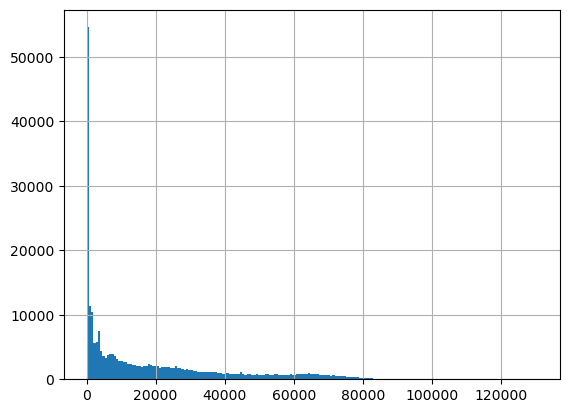

In [7]:
df2["LastIncomingEmail__c"].str.len().hist(bins=200)

40355


<AxesSubplot:>

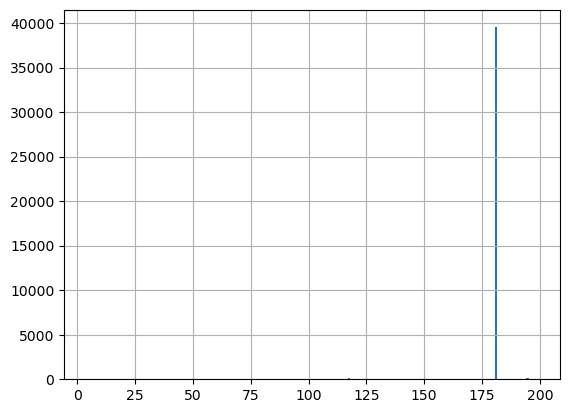

In [8]:
subset = df2[df2["LastIncomingEmail__c"].str.len() < 200]

print(len(subset))
subset["LastIncomingEmail__c"].str.len().hist(bins=200)

In [9]:
print(len(subset["LastIncomingEmail__c"].iloc[0]))

181


In [10]:
# show more rows
pd.set_option('display.max_rows', 500)

with open('../data/short_emails.txt', 'w') as f:
    for row in subset["LastIncomingEmail__c"]:
        # print the row in a new text file
        f.write(row + "\n" + "\n")
        

In [11]:
print(subset["LastIncomingEmail__c"].iloc[0])

<div style="font-family: Consolas, monaco, monospace; font-size: 0.90rem;">
	<table style="width: 100%;"><tr><td colspan="1" rowspan="1" style="width: 33%;"></td></tr></table></div>


### Important conclusion here:

We see that a large number of emails: 40355 have nearly-empty contents. All of these email have the same HTML tags as showed above, but don't contain any relevant information. They have exactly the 181 caracters shown above. We can safely consider these emails as empty in our dataset.

<AxesSubplot:>

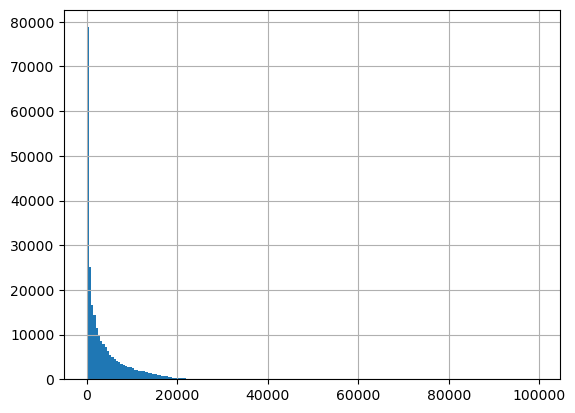

In [12]:
df_clean["LastIncomingEmailContent"].str.len().hist(bins=200)

<AxesSubplot:>

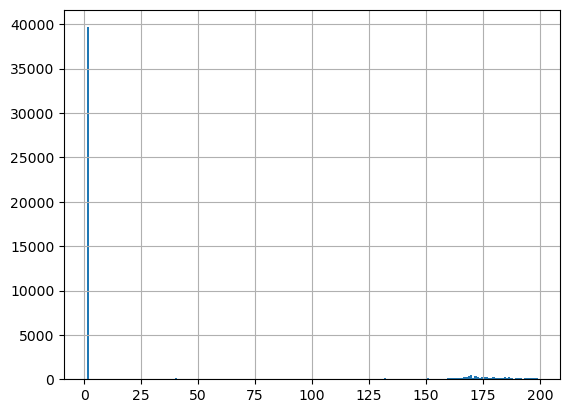

In [13]:
subset = df_clean[df_clean["LastIncomingEmailContent"].str.len() < 200]
subset["LastIncomingEmailContent"].str.len().hist(bins=200)

### Let's remove the 40,000 rows which are nearly empty from our dataset to clean. Indeed, we do not need to find the "last email" of the empty emails. Let's keep only the emails having a length higher than 25. (We cannot use the threshold of 181 shown above as Beautiful Soup already removed the HTML tags.)

In [14]:
df_to_clean1 = df_clean[df_clean["LastIncomingEmailContent"].str.len() > 100]
print(len(df_to_clean1))

209743


## Important conclusion here:
The Beautiful Soup process doesn't remove any rows having "Sent:", "From:" or "To:" keywords.

In [22]:
print(df['LastIncomingEmail__c'].str.contains('From:').sum() )
print(df['LastIncomingEmail__c'].str.contains('Sent:').sum())
print(df['LastIncomingEmail__c'].str.contains('To:').sum())

143720
139840
136627


In [23]:
print(df_clean['LastIncomingEmailContent'].str.contains('From:').sum())
print(df_clean['LastIncomingEmailContent'].str.contains('Sent:').sum())
print(df_clean['LastIncomingEmailContent'].str.contains('To:').sum())

143720
139840
136627


After removing the empty emails, we have that 68.5% of the non-empty emails can be splitted using the "From" keyword.

In [24]:
print(df_to_clean1['LastIncomingEmailContent'].str.contains('From:').sum() / len(df_to_clean1))
print(df_to_clean1['LastIncomingEmailContent'].str.contains('Sent:').sum() / len(df_to_clean1))
print(df_to_clean1['LastIncomingEmailContent'].str.contains('To:').sum() / len(df_to_clean1))

0.6852195305683623
0.666720701048426
0.6514019538196746


-- For 68.5% of emails, I extract based on the keyword "From"

Let's see what can be done with the other 43% of emails.

In [25]:
df_to_clean2 = df_to_clean1[~df_to_clean1['LastIncomingEmailContent'].str.contains('From:').astype(bool)]

cleaned_mails = df_to_clean1[df_to_clean1['LastIncomingEmailContent'].str.contains('From:').astype(bool)]
# cut the text after the first occurrence of "From:"
cleaned_mails["LastIncomingEmailContent"] = cleaned_mails["LastIncomingEmailContent"].str.split("From:").str[0]

/var/folders/hk/nxk7bnsj4kq9nwsmnmdtzhb80000gn/T/ipykernel_3300/2819368117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_mails["LastIncomingEmailContent"] = cleaned_mails["LastIncomingEmailContent"].str.split("From:").str[0]


In [27]:
# Get the average length of  LastIncomingEmailContent	
print(cleaned_mails['LastIncomingEmailContent'].str.len().mean())
print(cleaned_mails['LastIncomingEmailContent'].str.len().median())
print(df_to_clean2['LastIncomingEmailContent'].str.len().mean())
print(df_to_clean2['LastIncomingEmailContent'].str.len().median())

615.9269830225438
437.0
955.0495584871938
435.0


We can see two things here:
- The median is roughly the same.
- The mean is higher for the emails which cannot be splitted using the "From" keyword.

Therefore, some emails that were not splitted:
- either contain multiple email threads
- have other CSS/HTML tags that we have to find.

We see here that the average length of one dataset is 615 caracters. We can use this information to split the future emails.

In [30]:
print(len(df_to_clean2))
df_to_clean2.head()

# show more rows
pd.set_option('display.max_rows', 500)

with open('../data/short_emails_long2.txt', 'w') as f:
    for row in df_to_clean2["LastIncomingEmailContent"]:
        if len(row) > 2000:
            # print the row in a new text file
            f.write(row + "\n ----------------------------------------------- \n")

66023


By looking at the data, we see many CSS/HTML tags. Lets remove any element between:
[] and {}

In [5]:
# Remove elements between {} amd [] due to many emails with CSS tags/HTML tags.

def parenthesis_cleaner(test_str):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in test_str:
        if i == '{':
            skip1c += 1
        elif i == '[':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == '}'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret


In [32]:
# apply parenthesis_cleaner to the LastIncomingEmailContent column
df_to_clean2["LastIncomingEmailContent"] = df_to_clean2["LastIncomingEmailContent"].apply(parenthesis_cleaner)

/var/folders/hk/nxk7bnsj4kq9nwsmnmdtzhb80000gn/T/ipykernel_3300/3456094467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_clean2["LastIncomingEmailContent"] = df_to_clean2["LastIncomingEmailContent"].apply(parenthesis_cleaner)


In [33]:
# Get the average length of  LastIncomingEmailContent	
print(cleaned_mails['LastIncomingEmailContent'].str.len().mean())
print(cleaned_mails['LastIncomingEmailContent'].str.len().median())
print(df_to_clean2['LastIncomingEmailContent'].str.len().mean())
print(df_to_clean2['LastIncomingEmailContent'].str.len().median())

615.9269830225438
437.0
582.430925586538
383.0


Now, we realize that all last emails are selected. The emails not containing the keyword "From" are simply single emails. We can visualize them to make sure.

In [34]:
df_to_clean2.head()

,CaseNumber,Type,Topics,TeamName,RequesterEmail,EmailObject,LastEmailCCAddress,AttributesURL,ContactAttributesURL,ContactEmail,LastIncomingEmailContent,LastEmailCCAddressCount
18,100110808,0,T202,US-NOR-CMA-DISPUTES-IMPORTFREIGHT,hidalgo@avantiproducts.com,RE: RATE DISCREPANCIES - 2/2 Invoice #NAIM8...,usa.jtederous@usa.cma-cgm.com; usa.aavila@cma-...,5005p00002evXisAAE,0030N00003LjiwBQAR,hidalgo@avantiproducts.com,"\nHi Adalver \nIn addition to previous lists, ...",5
21,100115766,0,T044,US-NOR-CMA-CS-EXP-AUTOS,NaN,NAM5069156 CC LA TRAVIATA 0MRA,logistics@caucasusauto.com; usa.cmaexportactiv...,5005p00002evXkZAAU,0030N00003ReNZjQAN,logistics@caucasusauto.com,"Adding a loading party,please send all the ing...",3
24,100115692,0,T847,US-NOR-CMA-EXP-ELITE-NESTLE,candace.williams@steamlogistics.com,Re: CMA CGM - Cut-off date cha,NaN,5005p00002evXrhAAE,0030N00003N9LeUQAV,candace.williams@steamlogistics.com,"Hello,Please send us the updated booking confi...",0
25,100115730,0,T037,US-NOR-CMA-BKG-PREFERRED,daniel@lindseyforwarders.com,NAM5027552 need revised bkg co,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXrmAAE,0030N000032cSZ0QAM,daniel@lindseyforwarders.com,"\nHello CMA,\n \nWe have learned that the vess...",1
26,100115731,0,T037,US-NOR-CMA-BKG-PREFERRED,daniel@lindseyforwarders.com,NAM5027552 need revised bkg co,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXrnAAE,0030N000032cSZ0QAM,daniel@lindseyforwarders.com,"\nHello CMA,\n \nWe have learned that the vess...",1


In [35]:
with open('../data/short_emails_long_cleanded2.txt', 'w') as f:
    for row in df_to_clean2["LastIncomingEmailContent"]:
        if len(row) > 2000:
            # print the row in a new text file
            f.write(row + "\n ----------------------------------------------- \n")

<AxesSubplot:>

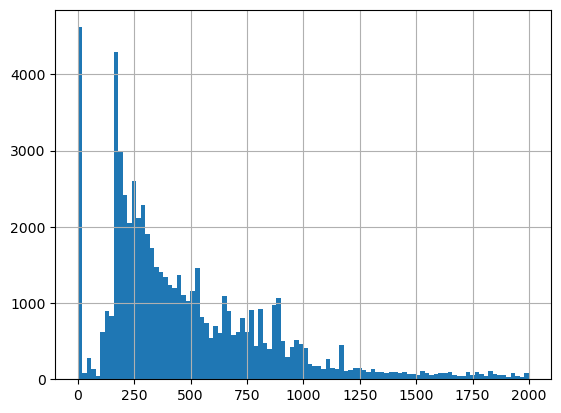

In [36]:
# check the distribution of the length of df_to_clean["LastIncomingEmailContent"]
subset = df_to_clean2[df_to_clean2["LastIncomingEmailContent"].str.len() < 2000]
subset["LastIncomingEmailContent"].str.len().hist(bins=100)

Therefore, let's implement the whole pipeline to extract the text from the last email:

In [38]:
df_clean.head()

,CaseNumber,Type,Topics,TeamName,RequesterEmail,EmailObject,LastEmailCCAddress,AttributesURL,ContactAttributesURL,ContactEmail,LastIncomingEmailContent,LastEmailCCAddressCount
0,100124562,0,T039,US-NOR-CMA-BKG-PREFERRED,NaN,NAM4999926A,op@easywayintl.com,5005p00002evRjHAAU,0035p00003aZAdZAAW,usa.wcportops@cma-cgm.com,\nThank you Jessica! Await your further on th...,1
1,100080371,0,T036,US-BNA-CMA-CS-IMP-DIVERSIONS,NaN,MOGELIJKE COD'S F119086 // RTM,janneke.van.leeuwen@fclmarine.nl; executivedes...,5005p00002evWsuAAE,0030N00003N771RQAR,janneke.van.leeuwen@fclmarine.nl,"\nHi Nese,\n \nInmiddels de aangepaste bl’s al...",5
2,100095395,0,T035,US-NOR-CMA-BKG-PREFERRED,tina@generallogistics.net,AMEND NAM5088900 [ ref:_00D,bookings@generallogistics.net,5005p00002evX4SAAU,0030N00002x1JqPQAU,tina@generallogistics.net,"\nHello,\nPlease SPLIT subject line booking to...",1
3,100097054,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXIsAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",1
4,100097055,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,NaN,5005p00002evXItAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",0


In [4]:
import re

## create a function
def clean_text(text):

    # convert text to string
    text = str(text)
    text = parenthesis_cleaner(text)

    if text.find('From:'):
        # cut the text after the first occurrence of "From:"
        text = text.split("From:")[0]
    elif text.find('Sent:'):
        # cut the text after the first occurrence of "Sent:"
        text = text.split("Sent:")[0]
    elif text.find('To:'):
        # cut the text after the first occurrence of "To:"
        text = text.split("To:")[0]
    elif len(text) < 25:
        text = " "
    else:
        text = text
        
    # Clean the rest of the text

    # remove html tags
    text = re.sub(r'<.*?>', '', text) 

    # convert text to lowercase
    text = text.strip().lower()

    # remove punctuation
    # text = re.sub(r'[^\w\s]', '', text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    return text

In [6]:
from tqdm import tqdm
tqdm.pandas()

# apply the function on the LastIncomingEmailContent
df_clean = pd.read_csv('/Users/victor/Documents/Confidential Dataset/ML_NOAC_NOVA_Extraction_Cleaned.csv')

df_clean = df_clean.replace(r'\n\n',' ', regex=True) 
df_clean = df_clean.replace(r'  ',' ', regex=True) 
df_clean = df_clean.replace(r'\t\t',' ', regex=True) 
df_clean["LastEmailContent"] = df_clean["LastIncomingEmailContent"].progress_apply(clean_text)

100%|██████████| 251234/251234 [01:15<00:00, 3336.64it/s]


In [7]:
df_clean.head()

,CaseNumber,Type,Topics,TeamName,RequesterEmail,EmailObject,LastEmailCCAddress,AttributesURL,ContactAttributesURL,ContactEmail,LastIncomingEmailContent,LastEmailCCAddressCount,LastEmailContent
0,100124562,0,T039,US-NOR-CMA-BKG-PREFERRED,NaN,NAM4999926A,op@easywayintl.com,5005p00002evRjHAAU,0035p00003aZAdZAAW,usa.wcportops@cma-cgm.com,\nThank you Jessica! Await your further on th...,1,thank you jessica! await your further on the t...
1,100080371,0,T036,US-BNA-CMA-CS-IMP-DIVERSIONS,NaN,MOGELIJKE COD'S F119086 // RTM,janneke.van.leeuwen@fclmarine.nl; executivedes...,5005p00002evWsuAAE,0030N00003N771RQAR,janneke.van.leeuwen@fclmarine.nl,"\nHi Nese,\n \nInmiddels de aangepaste bl’s al...",5,"hi nese, inmiddels de aangepaste bl’s al besch..."
2,100095395,0,T035,US-NOR-CMA-BKG-PREFERRED,tina@generallogistics.net,AMEND NAM5088900 [ ref:_00D,bookings@generallogistics.net,5005p00002evX4SAAU,0030N00002x1JqPQAU,tina@generallogistics.net,"\nHello,\nPlease SPLIT subject line booking to...",1,"hello, please split subject line booking to th..."
3,100097054,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,usa.cmaexportactive@usa.cma-cgm.com,5005p00002evXIsAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",1,"cma cgm - cut-off date change at - new york, n..."
4,100097055,0,T847,US-NOR-CMA-BKG-SPECIALTY,bookings@delongcompany.com,FW: CMA CGM - Cut-off date cha,NaN,5005p00002evXItAAM,0030N00002tXvvIQAS,bookings@delongcompany.com,"CMA CGM - Cut-off date change at - NEW YORK, N...",0,"cma cgm - cut-off date change at - new york, n..."


In [10]:
with open('../data/emails_cleaned.txt', 'w') as f:
    for row in df_clean["LastEmailContent"]:
        # print the row in a new text file
        f.write(row + "\n ----------------------------------------------- \n")

### Last step - Clean the text of the last email:
Remove special characters and stuff.

In [273]:
import re

mystring = df_to_clean["LastIncomingEmailContent"].iloc[3]

# re.sub('\W+','', mystring )

re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", mystring)


'HelloPlease send us the updated booking confirmations for these 2 bookingsThank you!\n\n\n Candace Williams \n\n\nEnterprise Coordinator\n\n\n\n Steam Logistics\n\n\n\n\n\n\n\n\n\n\n\n                                                        8332262953\n                                                    \n\n\n\n\n\n\n\n\n\ncandacewilliamssteamlogisticscom\n\n\n\n\n\n\n\n\n\nsteamlogisticscom\n\n\n\n\n\n\n\n\n 325 Market Street Suite 204 Chattanooga TN 37402\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOn February 28 2022 237 PM EST websitenoreplycmacgmcom wrote\n\n\n\n\n\n\n\n\n\n\n\neBusiness \n                                        \xa0\xa0\n                                        Notifications\n\n\nCMA CGM  Cutoff date change at LONG BEACH CA US\n\n\nDear customer\n\n\t\t\t\tThe cutoff date of voyage 0TIB8W1MA at LONG BEACH CA US has changed \nThe previous cutoff was 312022 at 400 PM \n\t\t\tThe new cutoff is 3112022 at 400 PM\n\t\t\nYour shipments imp

In [8]:
# extract the rows for which the length of LastIncomingEmailContent is empty
subset = df_clean[df_clean["LastIncomingEmailContent"].str.len() < 5]

<AxesSubplot:>

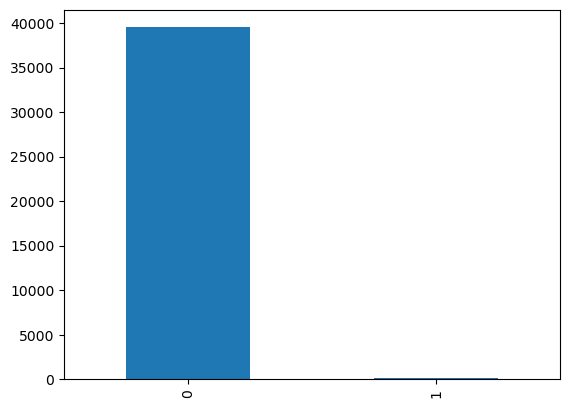

In [10]:
# plot the Type of subset
subset["Type"].value_counts().plot(kind='bar')